<a href="https://colab.research.google.com/github/ArturoSirvent/TFG_notebooks/blob/main/Preprocesado_datos_multitelescop/Nuevos_archivos_muchos_telescopios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
function ClickConnect(){
    console.log("Clicked on connect button"); 
    document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,60000)
"""

In [ ]:
import os
import numpy as np
import tarfile
import re
import gzip
import glob
import re
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#los directorios imporatantes son:
npy_save_dir="/content/drive/MyDrive/prediccion_datos_muchos_telescopios/datos_muchos_tels_seleccion_6_03_21"
datos_compr="/content/drive/MyDrive/Datos_CTA_02_03_2021"
npy_data="/content/drive/MyDrive/prediccion_datos_muchos_telescopios/datos_muchos_tels_seleccion_6_03_21/npy_data"

#Extraer

In [ ]:
def extract_tar(dir_in,dir_out,final_folder=True):
    #esta funcion recibe el directorio de un .tar y nos lo pone en una carpeta 
    #en dir_our con el mismo nombre (si folder=True)
    if tarfile.is_tarfile(dir_in)!=True:
        print("ERROR, NO ES TARF ILE")
        return
    else:
        with tarfile.open(dir_in) as aux_tar:
            if final_folder:
                nombre_aux=os.path.basename(dir_in).replace(".tar","")
                dir_out=f"{dir_out}/{nombre_aux}"
                os.mkdir(dir_out)
            aux_tar.extractall(dir_out)

SyntaxError: ignored

In [ ]:
lista_tar=os.listdir(datos_compr)
for i in lista_tar:
    print(i)
    extract_tar(f"{datos_compr}/{i}",npy_save_dir,final_folder=True)

iron.tar
helium.tar
nitrogen.tar
silican.tar
proton.tar
electron.tar


#Descomprimir

In [ ]:
#ahora la descompresion de los archivos
 
#lo primero que vamos a hacer es descomprimir los gunzip que tenemos
def descomprimir_gunzip(ground_dir,elements,folders=True):
#es necesaria una carpeta con carpetas para los elementos y se crearan nuevas como extract_element
  #funcion para descomprimir los elementos gunzip
  #ground_dir es la carpeta padre de las otras carpetas o la contenedora de los datos talcual.
  #elementos son los [gamma,electron,silicium...]
  #folders true nos indica que hay carpetas contenedoras para cada elemento. I false, estan todos los datos
  #en el ground directory.
  if folders:
    for i in elements:
        new_folder=f"{ground_dir}/extract_{i}"
        os.mkdir(new_folder)
        element_dir=f"{ground_dir}/{i}"
        os.chdir(element_dir)
        files_names_dt=glob.glob("*.dt.gz")
        files_names_txt=[h.replace(".dt.gz",".txt.gz") for h in files_names_dt]

        for j in tqdm(range(len(files_names_dt))):
            try:
                if (os.path.isfile(f"{element_dir}/{files_names_dt[j]}")) and (os.path.isfile(f"{element_dir}/{files_names_txt[j]}")):
                    #print(files_names_dt[j].replace(".dt.gz",""))
                    with gzip.open(f"{element_dir}/{files_names_dt[j]}","rb") as f:
                        new_name_dt=files_names_dt[j].replace(".dt.gz",".dt")
                        fp=open(f"{new_folder}/{new_name_dt}","wb")
                        aux=f.read()
                        fp.write(aux)
                        fp.close()
                        f.close()
                    with gzip.open(f"{element_dir}/{files_names_txt[j]}","rb") as f:
                        new_name_txt=files_names_txt[j].replace(".txt.gz",".txt")
                        fp=open(f"{new_folder}/{new_name_txt}","wb")
                        aux=f.read()
                        fp.write(aux)
                        fp.close()
                        f.close()
                    
                else:
                    print(f"Para el elemento : {files_names_dt[j]} no hay un txt correspondiente")
            except IndexError:
                print("Hay más elementos dt que txt")

                


In [ ]:
elementos=["iron","nitrogen","silicon","electron","helium","proton","gamma"]
descomprimir_gunzip(npy_save_dir,elementos,folders=True)

In [ ]:
a=".txt"

# Que datos tenemos y cuales faltan?

In [ ]:
def dif_dt_txt(dir,faltantes=False,max_val=None,ending=(".dt",".txt")):
    #esta funcion comprueba si hay los mismo archivos para txt y dt y cuales faltan y hasta que run llegan
    #devuelve un diccionario con los telescopios y las runs de cada uno

    #si pedimos los faltantes y damos un max_val obtenemos los que no hay en cada run
    os.chdir(dir)
    file_dt=glob.glob(f"*{ending[0]}")
    file_txt=glob.glob(f"*{ending[1]}")

    #primero extraemos la informacion importante, el tel y la run
    tel_run_dt=np.array([ np.array([ re.findall("tel_([0-9]*)_",i)[0] ,re.findall("run_([0-9]*).",i)[0]],dtype="int")  for i in file_dt])
    tel_run_txt=np.array([ np.array([ re.findall("tel_([0-9]*)_",i)[0] ,re.findall("run_([0-9]*).",i)[0] ],dtype="int")  for i in file_txt])

    #una vez tenemos la info, queremos ver si son iguales
    #primero las dimensiones
    if tel_run_dt.shape[0]!=tel_run_txt.shape[0]:
        print("Error con las dimensiones, no hay los mismos")
        if tel_run_dt.shape[0] > tel_run_txt.shape[0]:
            for i in tel_run_dt:
                if not np.all(tel_run_txt==i,axis=-1).any():
                    print(f"El tel_{i[0]}_run_{i[1]}.{ending[0]} no tiene correspondiente {ending[1]}.")
        else:
            for i in tel_run_txt:
                if not np.all(tel_run_dt==i,axis=-1).any():
                    print(f"El tel_{i[0]}_run_{i[1]}.{ending[1]} no tiene correspondiente {ending[0]}.")
        return None

    #son iguales las dos listas?
    salir=False
    for i in tel_run_dt:
        if i not in tel_run_txt:
            print(f"{i} no tiene correspondiente {ending[0]}")
            salir=True
    for i in tel_run_txt:
        if i not in tel_run_dt:
            print(f"{i} no tiene correspondiente {ending[1]}")
            salir=True
    if salir:
        return None
    else:
        print(f"Para \"{os.path.basename(dir)}\" todos los {ending[1]} tienen {ending[0]} y viceversa, todo bien.")
    
    #si las dimensiones sí estan bien entonces pasamos a listar los telescopios que hay para cada elemento y las runs para cada telescopio
    telescopios=sorted(np.unique(tel_run_dt[:,0]))
    runs=[sorted(tel_run_dt[tel_run_dt[:,0]==i][:,1]) for i in telescopios]
    #por ultimo vamos a hacer un diccionario que tenga el telescopios y las runs que agrupa
    if not faltantes:
        return dict(zip(telescopios,runs))
    else:
        if max_val is None:
            print("pasa un valor maximo para las runs")
            return None
        else:
            runs_reales=np.arange(1,max_val+1)
            run_faltantes=[]
            for i in range(len(runs)):
                faltan=[]
                for j in runs_reales:
                    if j not in runs[i]:
                        faltan.append(j)
                run_faltantes.append(faltan)
            diccionario=dict(zip(telescopios,run_faltantes))
            for i in telescopios:
                if (diccionario[i]==[]):
                    diccionario.pop(i)
            return diccionario

In [ ]:
elementos=["iron","nitrogen","silicon","electron","helium","proton","gamma"]
max_runs=[20,40,40,40,40,40,41]
lista=[]
for j,elem in enumerate(elementos):
    carpeta=f"{npy_save_dir}/extract_{elem}"
    lista.append(dif_dt_txt(carpeta,faltantes=True,max_val=max_runs[j]))#,ending=(".dt.gz","txt.gz")))

lista=dict(zip(elementos,lista))

Para "extract_iron" todos los .txt tienen .dt y viceversa, todo bien.
Para "extract_nitrogen" todos los .txt tienen .dt y viceversa, todo bien.
Para "extract_silicon" todos los .txt tienen .dt y viceversa, todo bien.
Para "extract_electron" todos los .txt tienen .dt y viceversa, todo bien.
Para "extract_helium" todos los .txt tienen .dt y viceversa, todo bien.
Para "extract_proton" todos los .txt tienen .dt y viceversa, todo bien.
Para "extract_gamma" todos los .txt tienen .dt y viceversa, todo bien.


In [ ]:
#bueno podemos ver que no esta bien esta
lista

{'electron': {},
 'gamma': {},
 'helium': {},
 'iron': {101: [5, 15], 102: [12]},
 'nitrogen': {101: [30, 39], 102: [27], 103: [29, 33], 104: [12]},
 'proton': {},
 'silicon': {101: [8, 40], 104: [29, 38]}}

In [ ]:
elementos=["iron","nitrogen","silicon","electron","helium","proton","gamma"]
max_runs=[20,40,40,40,40,40,41]
lista=[]
for j,elem in enumerate(elementos):
    carpeta=f"{npy_save_dir}/{elem}"
    lista.append(dif_dt_txt(carpeta,faltantes=True,max_val=max_runs[j],ending=(".dt.gz","txt.gz")))

lista=dict(zip(elementos,lista))
lista

Error con las dimensiones, no hay los mismos
El tel_101_run_5.txt.gz no tiene correspondiente .dt.gz.
El tel_101_run_15.txt.gz no tiene correspondiente .dt.gz.
El tel_102_run_12.txt.gz no tiene correspondiente .dt.gz.
Error con las dimensiones, no hay los mismos
El tel_101_run_39.txt.gz no tiene correspondiente .dt.gz.
El tel_101_run_30.txt.gz no tiene correspondiente .dt.gz.
El tel_102_run_27.txt.gz no tiene correspondiente .dt.gz.
El tel_103_run_33.txt.gz no tiene correspondiente .dt.gz.
El tel_103_run_29.txt.gz no tiene correspondiente .dt.gz.
El tel_104_run_12.txt.gz no tiene correspondiente .dt.gz.
Error con las dimensiones, no hay los mismos
El tel_101_run_8.txt.gz no tiene correspondiente .dt.gz.
El tel_101_run_40.txt.gz no tiene correspondiente .dt.gz.
El tel_104_run_38.txt.gz no tiene correspondiente .dt.gz.
El tel_104_run_29.txt.gz no tiene correspondiente .dt.gz.
Para "electron" todos los txt.gz tienen .dt.gz y viceversa, todo bien.
Para "helium" todos los txt.gz tienen .dt.

{'electron': {},
 'gamma': {},
 'helium': {},
 'iron': None,
 'nitrogen': None,
 'proton': {},
 'silicon': None}

In [ ]:
np.all(a[1][:2]==[4,17],axis=1)

array([ True, False])

#Ahora procesarlos para obtener las imagenes npy y las labels de energia

In [ ]:
#GUARDAR LOS ARCHIVOS COMO .NPY pero sin normalizar ni nada
 
#tenemos que buscar una forma de que no guardemos archivos npy de mas de un giga (por poner un limite)
#from tqdm.notebook import tqdm
 
def multiple_dt_2_npy(lista_archivos,npy_dir,limit_size=0.35,save_events_id=False,verbose=False):
    #le pasamos una lista de directorios y los guardará descomprimidos y sin normalizar en npy_dir
    #ground_dir es el directorio base para las carpetas o para los archivos
    #npy_dir es el directorio para guardar todosl os .npy juntos, sin fantasia ni carpetas
    #folders=True es que lo .dt estan en carpetas
    #limit_size limite de peso en gigas de los .npy, por defecto esat en 350 Mb ó 0.35 Gigas
    limit_size=limit_size*1e9 # pasamos de gigas a bytes 
    npy_dir_aux=npy_dir
    num_pix_x=0
    num_pix_y=0
    files_names=lista_archivos
    verbose_list=[]
    for j in range(len(files_names)):
        contador_nombre=0
        dt_list=[]  
        nombre_archivo=re.findall("([a-zA-Z]*_tel_[0-9]*_run_\d\d).dt",files_names[j])[0]
        aux_df=pd.read_csv(files_names[j],sep='  ',names=["1","2","3","4","5","6"],engine="python")
        #ahora la procesamos y la guardamos en un npy
        value_auf=aux_df[['1','3','4','5']].copy()
        del aux_df
        #tenemos que agupar los valores 
        value_auf.loc[value_auf["5"]<0,"5"]=0
        #max_aux=np.amax(value_auf["5"])
        #value_auf["5"]=value_auf["5"]/max_aux
        x_minimo=min(value_auf['3'])
        y_minimo=min(value_auf['4'])
        events=value_auf["1"].unique()
        num_pix_x_aux=value_auf["3"].unique().size
        num_pix_y_aux=value_auf["4"].unique().size
        if (num_pix_x != num_pix_x_aux) or (num_pix_y != num_pix_y_aux) : #tenemos que ser capacer de cambiar segun si observamos un telescopio u otro
            num_pix_x=num_pix_x_aux
            num_pix_y=num_pix_y_aux
            if verbose:
                #print(num_pix_x,num_pix_y)
                verbose_list.append((num_pix_x,num_pix_y))
 
            x_minimo=min(value_auf['3'])
            y_minimo=min(value_auf['4'])
            ##!!!esto puede dar problemas si resulta que para el primer evento faltan datos o algo...
            auxiliar=value_auf.loc[value_auf["1"]==events[0]][["3","4","5"]].to_numpy()
            #ahora tenemos los datos de los pixeles, podemos obtener lo que ocupa cada pixel
            size_pix_x=np.ceil((max(auxiliar[:,0])-min(auxiliar[:,0]))/(np.unique(auxiliar[:,0]).size-1))
            size_pix_y=np.ceil((max(auxiliar[:,1])-min(auxiliar[:,1]))/(np.unique(auxiliar[:,1]).size-1))
            del auxiliar
        if verbose:
            #print(nombre_archivo,end="\n")
            verbose_list.append(nombre_archivo)
 
        value_auf.loc[:,'3']=value_auf['3'].apply(lambda x: round((x-x_minimo)/size_pix_x))
        value_auf.loc[:,'4']=value_auf['4'].apply(lambda x: round((x-y_minimo)/size_pix_y))
        #event_aux=value_auf["1"].unique()
        for k in range(np.shape(events)[0]):
            #cada evento tiene que ponerse en una imagen con sus valores
            array_aux=value_auf.loc[value_auf["1"]==events[k]][["3","4","5"]]
            #lo que vamos a hacer es poner los valores en una matriz creada de antemano y guardar esa matrix
            #esos numeros vienen del maximo y el minimo valor para los pixeles, simplemente shifteamos todo
            matrix_aux=np.zeros((num_pix_x,num_pix_y)) #eran 60-5= 55 y 131-38
            matrix_aux[array_aux["3"].to_numpy(),array_aux["4"].to_numpy()]=array_aux["5"].to_numpy() 
            dt_list.append(matrix_aux)
            if limit_size!=0:
                if (np.array(dt_list).nbytes>limit_size):
                    if contador_nombre==0:
                        name_npy=f"{npy_dir_auxf}/npy_sin_norm_{nombre_archivo}_{contador_nombre}.npy"
                    np.save(name_npy,np.array(dt_list))
                    del dt_list
                    dt_list=[]
                    contador_nombre+=1
        name_npy=f"{npy_dir_aux}/npy_sin_normal_{nombre_archivo}_{contador_nombre}.npy"
        np.save(name_npy,np.array(dt_list))
        del dt_list
        if save_events_id:
            name_npy_events=f"{npy_dir_aux}/id_eventos_npy_sin_normal_{nombre_archivo}.npy"
            np.save(name_npy_events,np.array(events))
    if verbose:
        return verbose_list

In [ ]:
def lista_dt(dt_dir):
    return sorted(glob.glob(f"{dt_dir}/*.dt"))
def lista_txt(txt_dir):
    return sorted(glob.glob(f"{txt_dir}/*.dt"))

In [ ]:
#tenemos que pasarle una lista de los archivos a descomprimir y decirle donde
elementos=["gamma"]
 
#vamos a entrar en cada extract folder,
#vamos a convertir cada .dt en un npy en una carpeta npy_elemento en npy_data
#ya estaría
 
for i,j in enumerate(elementos):
    #cargamos los nombres que necesitamos 
    fold_name=f"{npy_save_dir}/extract_{j}"  
    names_files=lista_dt(fold_name)
    #long=len(names_files)//2
    long2=len(names_files)-len(names_files)//3
    names_files=names_files[long2:]
    #creamos la carpeta destino
    carpeta_destino_name=f"{npy_data}/npy_{j}"
    #os.mkdir(carpeta_destino_name)
    #ahora solo tenemos que darle a la funcion la lista y el destino
    out=multiple_dt_2_npy(names_files,carpeta_destino_name,save_events_id=True,verbose=True)
    with open(f"{npy_data}/verbose_npy_{j}_parte3.txt","w") as file_aux:
        file_aux.write(str(out)) #podriamos poner .replace("[","").replace("]","") para quitar los bordes
        file_aux.close()
    del out

In [ ]:
#VARIANTE!!! SI TARDA MUCHO, HACEMOS UN LISTA AUXILIAR DONDE GUARDAMOS LAS QUE SE
#VAN GUARDANDO, Y AL REINICIAR SE LEE LA LISTA Y SE IGNORAN LAS QUE YA SE HAN PASADO

#tenemos que pasarle una lista de los archivos a descomprimir y decirle donde
elementos=["gamma"]

#vamos a entrar en cada extract folder,
#vamos a convertir cada .dt en un npy en una carpeta npy_elemento en npy_data
#ya estaría

for i,j in enumerate(elementos):


    #cargamos los nombres que necesitamos 
    fold_name=f"{npy_save_dir}/extract_{j}"
    names_files=lista_dt(fold_name)
    #creamos la carpeta destino
    carpeta_destino_name=f"{npy_data}/npy_{j}"
    if not os.path.isdir(carpeta_destino):
        os.mkdir(carpeta_destino_name)
        files_done=[]
    else:
        files_done=list(np.load(f"{carpeta_destino_name}/files_done_{j}.py"))
    #ahora solo tenemos que darle a la funcion la lista y el destino
    for k in names_files:
        if k not in files_done:
            multiple_dt_2_npy(k,carpeta_destino_name,save_events_id=True,verbose=False)
            files_done.append(k)
            np.save(f"{carpeta_destino_name}/files_done_{j}.py",files_done)

## Problema con los telescopios 58 59...

In [ ]:
a1=np.load("/content/drive/MyDrive/prediccion_datos_muchos_telescopios/datos_muchos_tels_seleccion_6_03_21/npy_data/npy_iron/npy_sin_normal_iron_tel_59_run_01_0.npy")

In [ ]:
a1.shape

(363, 55, 93)

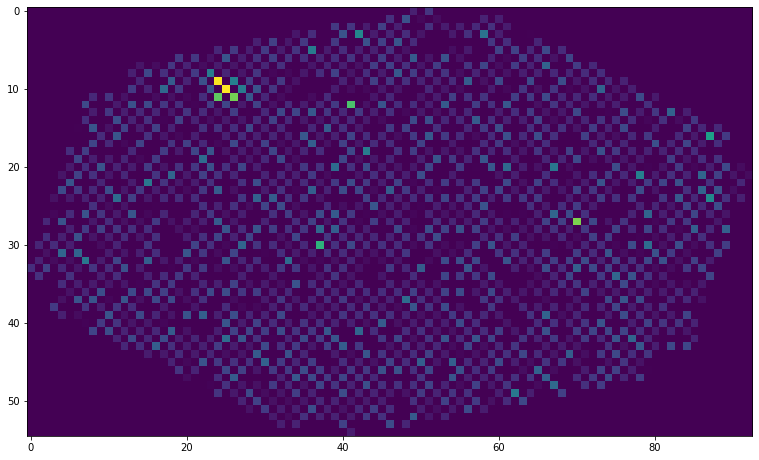

In [ ]:
plt.figure(figsize=(13,13))
plt.imshow(a1[76])

In [ ]:
#vamos a descomprimir directamente un dt del telescopios 60
base_dir="/content/drive/MyDrive"
run_tel_61="/content/drive/MyDrive/prediccion_datos_muchos_telescopios/datos_muchos_tels_seleccion_6_03_21/extract_iron/iron_tel_61_run_07.dt"

In [ ]:
multiple_dt_2_npy([run_tel_61],base_dir)

iron_tel_61_run_07
55 93


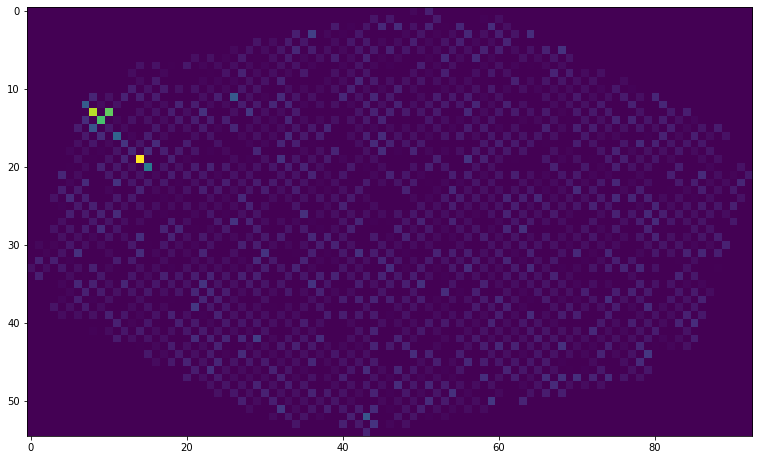

In [ ]:
dat_61="/content/drive/MyDrive/npy_sin_normal_iron_tel_61_run_07_0.npy"
a1=np.load(dat_61)
plt.figure(figsize=(13,13))
plt.imshow(a1[1])

**PUES NADA QUE EL 58,59,60,61 SON TELESCOPIOS DE LOS GRANDES , LO CUAL ESTA MAL PERO BUENO...**

## Comprobar que estan todos los dt como npy

In [ ]:
#ahora vamos a comprobar qeu exactamente, estan los mismos dt que npy 
 
def dif_dt_txt(dirs,faltantes=False,max_val=None,ending=(".dt",".txt")):
    #esta funcion comprueba si hay los mismo archivos para txt y dt y cuales faltan y hasta que run llegan
    #devuelve un diccionario con los telescopios y las runs de cada uno
 
    #si pedimos los faltantes y damos un max_val obtenemos los que no hay en cada run
    if (len(dirs)==2) and (type(dirs==list)):
        os.chdir(dirs[0])
        file_dt=glob.glob(f"*{ending[0]}")
        os.chdir(dirs[1])
        file_txt=glob.glob(f"npy_*{ending[1]}")
    elif (len(dirs)==1) and (type(dirs==list)):
        os.chdir(dirs[0])
        file_dt=glob.glob(f"*{ending[0]}")
        file_txt=glob.glob(f"*{ending[1]}")
    elif type(dirs)!=list:
        os.chdir(dirs)
        file_dt=glob.glob(f"*{ending[0]}")
        file_txt=glob.glob(f"*{ending[1]}")
    else:
        print("ERROR CON DIRS ")
        return None
 
    #primero extraemos la informacion importante, el tel y la run
    tel_run_dt=np.array([ np.array([ re.findall("tel_([0-9]*)_",i)[0] ,re.findall("run_([0-9]*).",i)[0]],dtype="int")  for i in file_dt])
    tel_run_txt=np.array([ np.array([ re.findall("tel_([0-9]*)_",i)[0] ,re.findall("run_([0-9]*).",i)[0] ],dtype="int")  for i in file_txt])
 
    #una vez tenemos la info, queremos ver si son iguales
    #primero las dimensiones
    if tel_run_dt.shape[0]!=tel_run_txt.shape[0]:
        print("Error con las dimensiones, no hay los mismos")
        if tel_run_dt.shape[0] > tel_run_txt.shape[0]:
            for i in tel_run_dt:
                if not np.all(tel_run_txt==i,axis=-1).any():
                    print(f"El tel_{i[0]}_run_{i[1]}.{ending[0]} no tiene correspondiente {ending[1]}.")
        else:
            for i in tel_run_txt:
                if not np.all(tel_run_dt==i,axis=-1).any():
                    print(f"El tel_{i[0]}_run_{i[1]}.{ending[1]} no tiene correspondiente {ending[0]}.")
        return None
 
    #son iguales las dos listas?
    salir=False
    for i in tel_run_dt:
        if i not in tel_run_txt:
            print(f"{i} no tiene correspondiente {ending[0]}")
            salir=True
    for i in tel_run_txt:
        if i not in tel_run_dt:
            print(f"{i} no tiene correspondiente {ending[1]}")
            salir=True
    if salir:
        return None
    else:
        print(f"Para {os.path.basename(dirs[1])} todos los {ending[1]} tienen {ending[0]} y viceversa, todo bien.")
    
    #si las dimensiones sí estan bien entonces pasamos a listar los telescopios que hay para cada elemento y las runs para cada telescopio
    telescopios=sorted(np.unique(tel_run_dt[:,0]))
    runs=[sorted(tel_run_dt[tel_run_dt[:,0]==i][:,1]) for i in telescopios]
    #por ultimo vamos a hacer un diccionario que tenga el telescopios y las runs que agrupa
    if not faltantes:
        return dict(zip(telescopios,runs))
    else:
        if max_val is None:
            print("pasa un valor maximo para las runs")
            return None
        else:
            runs_reales=np.arange(1,max_val+1)
            run_faltantes=[]
            for i in range(len(runs)):
                faltan=[]
                for j in runs_reales:
                    if j not in runs[i]:
                        faltan.append(j)
                run_faltantes.append(faltan)
            diccionario=dict(zip(telescopios,run_faltantes))
            for i in telescopios:
                if (diccionario[i]==[]):
                    diccionario.pop(i)
            return diccionario

In [ ]:
#comprobamos para el iron
elementos=["gamma"]#,"nitrogen","silicon","electron","helium","proton","gamma"]
max_runs=41#,40,40,40,40,40,41]
 
lista=[]
for j,elem in enumerate(elementos):
    carpeta1=f"{npy_save_dir}/extract_{elem}"
    carpeta2=f"{npy_data}/npy_{elem}"
    lista.append(dif_dt_txt([carpeta1,carpeta2],faltantes=True,max_val=max_runs,ending=(".dt",".npy")))
 
lista=dict(zip(elementos,lista))
lista

Para npy_gamma todos los .npy tienen .dt y viceversa, todo bien.


{'gamma': {}}

In [ ]:
lista

{'gamma': {}}

# Extracción elementos para el telescopio 1

In [ ]:
base_dir_dt="/content/drive/MyDrive/analisis_datos_tfg_inicial_hasta_4_02_21"
dest_dir_npy="/content/drive/MyDrive/prediccion_datos_muchos_telescopios/datos_muchos_tels_seleccion_6_03_21/npy_data/npy_elementos_tel_1"


In [ ]:
#tenemos que pasarle una lista de los archivos a descomprimir y decirle donde
elementos=["nitrogen","gamma","silicon","electron","helium","proton","iron"]
 
#vamos a entrar en cada extract folder,
#vamos a convertir cada .dt en un npy en una carpeta npy_elemento en npy_data
#ya estaría
 
for i,j in enumerate(elementos):
    #cargamos los nombres que necesitamos 
    if j=="gamma":
        fold_name=f"{base_dir_dt}/gamma/gamma_dt"  
    else:    
        fold_name=f"{base_dir_dt}/{j}"  
    names_files=lista_dt(fold_name)
    #long=len(names_files)//2
    #long2=len(names_files)-len(names_files)//3
    #names_files=names_files[long2:]
    #creamos la carpeta destino
    carpeta_destino_name=f"{dest_dir_npy}/npy_tel_1_{j}"
    os.mkdir(carpeta_destino_name)
    #ahora solo tenemos que darle a la funcion la lista y el destino
    out=multiple_dt_2_npy(names_files,carpeta_destino_name,save_events_id=True,verbose=True)
    with open(f"{dest_dir_npy}/verbose_npy_{j}_tel_1.txt","w") as file_aux:
        file_aux.write(str(out)) #podriamos poner .replace("[","").replace("]","") para quitar los bordes
        file_aux.close()
    del out

# Datos sin ruido según la simulación.

En los datos se nus indica en la sexta columna que valore son reales y cuales son debido a ruido y tal. Vamos a ver si esto puede utilizarse para la construccion de un autoencoder que nos simplifique todo.

In [ ]:

def simple_load_dt_2_npy(file,verbose=False,save=False,save_events_id=False,npy_dir_aux=None,truth_sim=True):
    num_pix_x=0
    num_pix_y=0
    verbose_list=[]
    dt_list=[]  
    nombre_archivo=re.findall("([a-zA-Z]*_tel_[0-9]*_run_\d\d).dt",file)[0]
    aux_df=pd.read_csv(file,sep='  ',names=["1","2","3","4","5","6"],engine="python")
    #ahora la procesamos y la guardamos en un npy
    if truth_sim:
        value_auf=aux_df.loc[aux_df.loc[:,"6"]==1][['1','3','4','5']].copy()
    else:
        value_auf=aux_df[['1','3','4','5']].copy()

    del aux_df
    #tenemos que agupar los valores 
    value_auf.loc[value_auf["5"]<0,"5"]=0
    #max_aux=np.amax(value_auf["5"])
    #value_auf["5"]=value_auf["5"]/max_aux
    x_minimo=min(value_auf['3'])
    y_minimo=min(value_auf['4'])
    events=value_auf["1"].unique()
    num_pix_x_aux=value_auf["3"].unique().size
    num_pix_y_aux=value_auf["4"].unique().size
    if (num_pix_x != num_pix_x_aux) or (num_pix_y != num_pix_y_aux) : #tenemos que ser capacer de cambiar segun si observamos un telescopio u otro
        num_pix_x=num_pix_x_aux
        num_pix_y=num_pix_y_aux
        if verbose:
            #print(num_pix_x,num_pix_y)
            verbose_list.append((num_pix_x,num_pix_y))

        x_minimo=min(value_auf['3'])
        y_minimo=min(value_auf['4'])
        ##!!!esto puede dar problemas si resulta que para el primer evento faltan datos o algo...
        auxiliar=value_auf.loc[value_auf["1"]==events[0]][["3","4","5"]].to_numpy()
        #ahora tenemos los datos de los pixeles, podemos obtener lo que ocupa cada pixel
        size_pix_x=np.ceil((max(auxiliar[:,0])-min(auxiliar[:,0]))/(np.unique(auxiliar[:,0]).size-1))
        size_pix_y=np.ceil((max(auxiliar[:,1])-min(auxiliar[:,1]))/(np.unique(auxiliar[:,1]).size-1))
        del auxiliar
    if verbose:
        #print(nombre_archivo,end="\n")
        verbose_list.append(nombre_archivo)

    value_auf.loc[:,'3']=value_auf['3'].apply(lambda x: round((x-x_minimo)/size_pix_x))
    value_auf.loc[:,'4']=value_auf['4'].apply(lambda x: round((x-y_minimo)/size_pix_y))
    #event_aux=value_auf["1"].unique()
    for k in range(np.shape(events)[0]):
        #cada evento tiene que ponerse en una imagen con sus valores
        array_aux=value_auf.loc[value_auf["1"]==events[k]][["3","4","5"]]
        #lo que vamos a hacer es poner los valores en una matriz creada de antemano y guardar esa matrix
        #esos numeros vienen del maximo y el minimo valor para los pixeles, simplemente shifteamos todo
        matrix_aux=np.zeros((num_pix_x,num_pix_y)) #eran 60-5= 55 y 131-38
        matrix_aux[array_aux["3"].to_numpy(),array_aux["4"].to_numpy()]=array_aux["5"].to_numpy() 
        dt_list.append(matrix_aux)

    if save:
        name_npy=f"{npy_dir_aux}/npy_sin_normal_{nombre_archivo}_{contador_nombre}.npy"
        np.save(name_npy,np.array(dt_list))
    if save_events_id:
        name_npy_events=f"{npy_dir_aux}/id_eventos_npy_sin_normal_{nombre_archivo}.npy"
        np.save(name_npy_events,np.array(events))
    if verbose:
        return verbose_list, np.array(dt_list)
    else:
        return np.array(dt_list)

In [ ]:
#funcion que nos suaviza todo para que la red asimile mejor las cosicas
def fill_holes(npy):
    npy_aux=npy.copy()
    if type(npy)!=np.ndarray:
        print("Error input")
        return
    #para cada elemento que sea cero lo rellenamos con la media de los vecinos
    indices=np.where(npy[1:-1,1:-1]==0)
    indices_1=indices[1]+1
    indices_0=indices[0]+1
    for i in range(indices_1.shape[0]):
        media=(npy[indices_0[i]-1,indices_1[i]]+npy[indices_0[i],indices_1[i]-1]+npy[indices_0[i]+1,indices_1[i]]+npy[indices_0[i],indices_1[i]+1])/4
        npy_aux[indices_0[i],indices_1[i]]=media
    return npy_aux

In [ ]:
ruta_aux="/content/drive/MyDrive/prediccion_datos_muchos_telescopios/datos_muchos_tels_seleccion_6_03_21/extract_helium/helium_tel_11_run_18.dt"

a=simple_load_dt_2_npy(ruta_aux)
b=simple_load_dt_2_npy(ruta_aux,truth_sim=False)

In [ ]:
z=np.array(list(map(fill_holes,a))

IndexError: ignored

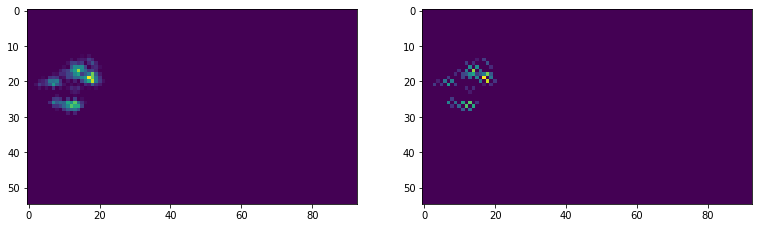

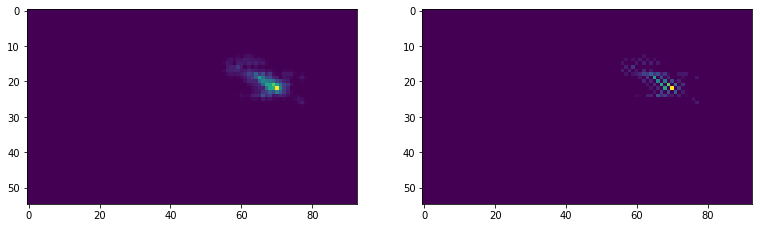

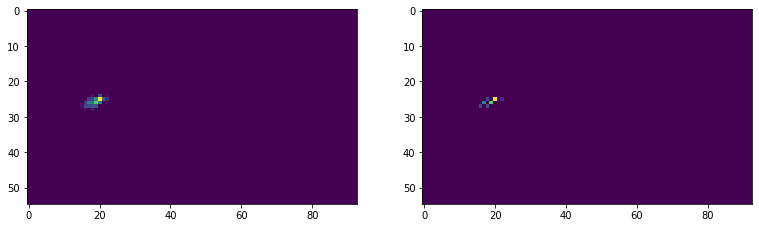

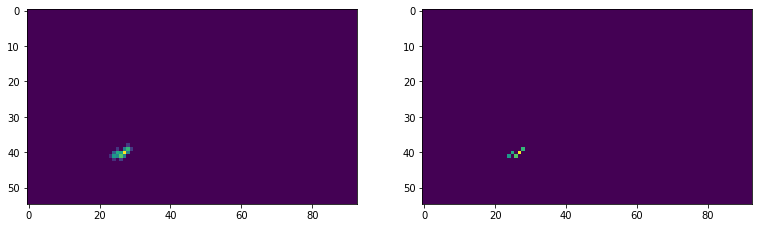

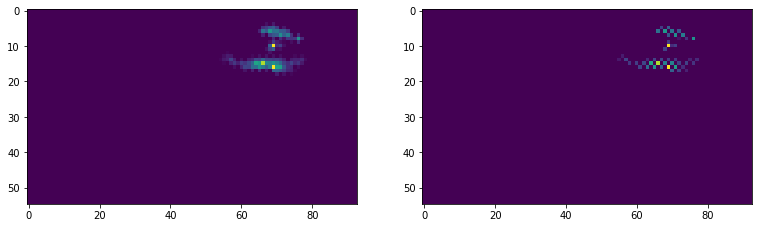

In [ ]:
for i in range(5):
    plt.figure(figsize=(13,13))
    plt.subplot(1,2,1)
    plt.imshow(fill_holes(a[i]))

    plt.subplot(1,2,2)
    plt.imshow(a[i])